In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import bootcampviztools as bvt
import warnings 
warnings.filterwarnings('ignore')

df_vg = pd.read_csv("../data/vgchartz-2024.csv")

In [2]:
df_vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [3]:
# Se verifica la existencia y cantidad de valores nulos presentes en el Dataset

df_vg.isna().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

In [4]:
# Se verifica si en el Dataset existen duplicados

df_vg.duplicated().sum()

np.int64(0)

In [5]:
# La columna "genre" la podria considerar categorica si se agrupan los valores con menos incidencias

genre_counts = df_vg.genre.value_counts(dropna=False)

# Inicializar un diccionario vacío
diccionario = {}

# Iterar sobre la Series usando un bucle
for indice, valor in genre_counts.items():
    diccionario[indice] = valor

diccionario

{'Misc': 9304,
 'Action': 8557,
 'Adventure': 6260,
 'Role-Playing': 5721,
 'Sports': 5586,
 'Shooter': 5410,
 'Platform': 4001,
 'Strategy': 3685,
 'Puzzle': 3521,
 'Racing': 3425,
 'Simulation': 3158,
 'Fighting': 2367,
 'Action-Adventure': 1877,
 'Visual Novel': 493,
 'Music': 297,
 'Party': 151,
 'MMO': 115,
 'Education': 35,
 'Board Game': 33,
 'Sandbox': 20}

In [6]:
# Normalizar la columna 'genre' (remover espacios y capitalizar)
df_vg['genre'] = df_vg['genre'].str.strip().str.capitalize()

# Asignar categorías a los géneros en la nueva columna
df_vg.loc[df_vg['genre'].isin(['Action', 'Fighting', 'Action-adventure']), 'genre'] = 'Acción'
df_vg.loc[df_vg['genre'] == 'Adventure', 'genre'] = 'Aventura'
df_vg.loc[df_vg['genre'] == 'Shooter', 'genre'] = 'Shooter'
df_vg.loc[df_vg['genre'].isin(['Sports', 'Racing']), 'genre'] = 'Deportes y Carreras'
df_vg.loc[df_vg['genre'].isin(['Strategy', 'Simulation', 'Puzzle']), 'genre'] = 'Estrategia y Simulación'
df_vg.loc[df_vg['genre'].isin(['Platform', 'Music', 'Party']), 'genre'] = 'Plataformas y Música'
df_vg.loc[df_vg['genre'].isin(['Role-playing', 'Mmo', 'Visual novel','Sandbox']), 'genre'] = 'RPG y MMO'
df_vg.loc[df_vg['genre'].isin(['Education', 'Board game','Misc']), 'genre'] = 'Misceláneos/Varios'

# Calcular el conteo de géneros agrupados antes de reemplazar
genre_counts = df_vg['genre'].value_counts()

genre_counts

genre
Acción                     12801
Estrategia y Simulación    10364
Misceláneos/Varios          9372
Deportes y Carreras         9011
RPG y MMO                   6349
Aventura                    6260
Shooter                     5410
Plataformas y Música        4449
Name: count, dtype: int64

In [7]:
df_vg.console.unique()

array(['PS3', 'PS4', 'PS2', 'X360', 'XOne', 'PC', 'PSP', 'Wii', 'PS',
       'DS', '2600', 'GBA', 'NES', 'XB', 'PSN', 'GEN', 'PSV', 'DC', 'N64',
       'SAT', 'SNES', 'GBC', 'GC', 'NS', '3DS', 'GB', 'WiiU', 'WS', 'VC',
       'NG', 'WW', 'SCD', 'PCE', 'XBL', '3DO', 'GG', 'OSX', 'Mob', 'PCFX',
       'Series', 'All', 'iOS', '5200', 'And', 'DSiW', 'Lynx', 'Linux',
       'MS', 'ZXS', 'ACPC', 'Amig', '7800', 'DSi', 'AJ', 'WinP', 'iQue',
       'GIZ', 'VB', 'Ouya', 'NGage', 'AST', 'MSD', 'S32X', 'XS', 'PS5',
       'Int', 'CV', 'Arc', 'C64', 'FDS', 'MSX', 'OR', 'C128', 'CDi',
       'CD32', 'BRW', 'FMT', 'ApII', 'Aco', 'BBCM', 'TG16'], dtype=object)

In [8]:
# Crear el diccionario de consolas agrupadas por compañía
company = {
    "Sony": ["PS3", "PS4", "PS2", "PS5", "PSP", "PS", "PSN", "PSV"],
    "Microsoft": ["X360", "XOne", "XS", "XB", "XBL"],
    "PC": ["PC"],
    "Nintendo": ["Wii", "DS", "GBA", "N64", "GBC", "GC", "3DS", "GB", "WiiU", "SNES", "NES", "NS"],
    "Sega": ["DC", "SAT", "GG", "MSD", "MS", "GEN", "SCD"],
    "Atari": ["2600", "7800"],
    "Móviles": ["iOS", "ApII","And"]
}

# Crear una nueva columna 'console_company' en el DataFrame con todos sus valores como "Otros"
df_vg["console_company"] = "Otros"

# Usar un bucle para asignar la compañía correcta a cada consola
for company_name, consoles in company.items():
    df_vg.loc[df_vg["console"].isin(consoles), "console_company"] = company_name

# Verificar el conteo de las compañías
df_vg["console_company"].value_counts()

console_company
Sony         16619
Nintendo     15694
PC           12617
Microsoft     7420
Otros         6783
Sega          3111
Móviles       1212
Atari          560
Name: count, dtype: int64

In [9]:
# Identificar las filas donde 'developer' tiene valores nulos
df_vg['developer'].isna()

# Rellenar valores nulos de 'developer' con los de 'publisher'
df_vg['developer'] = df_vg['developer'].fillna(df_vg['publisher'])

# Verificar la cantidad de valores nulos por columna
df_vg.isna().sum()

img                    0
title                  0
console                0
genre                  0
publisher              0
developer              0
critic_score       57338
total_sales        45094
na_sales           51379
jp_sales           57290
pal_sales          51192
other_sales        48888
release_date        7051
last_update        46137
console_company        0
dtype: int64

In [10]:
# Rellenar los valores de 'developer' con los de 'publisher' donde 'developer' sea 'Unknown'
df_vg.loc[df_vg['developer'] == 'Unknown', 'developer'] = df_vg['publisher']
df_vg['developer'].value_counts()

developer
Konami             979
Sega               968
Capcom             929
Unknown            885
Namco              499
                  ... 
L. Stotch            1
Dufgames             1
Innocent Grey        1
NickySwan            1
Digital Eclipse      1
Name: count, Length: 9218, dtype: int64

In [11]:
# Se muestran las ventas totales por 'publisher' antes de agrupar utilizando expresiones regulares.
df_vg.groupby('publisher')['total_sales'].sum().sort_values(ascending=False).head(15)

publisher
Activision                                722.77
Electronic Arts                           644.13
EA Sports                                 485.66
Ubisoft                                   462.57
THQ                                       320.89
Sony Computer Entertainment               311.08
Rockstar Games                            239.67
Konami                                    210.70
Sega                                      206.38
Nintendo                                  140.80
Capcom                                    131.24
LucasArts                                 118.48
Bethesda Softworks                        111.08
Warner Bros. Interactive Entertainment    103.51
Disney Interactive Studios                103.30
Name: total_sales, dtype: float64

In [12]:
# Diccionario con expresiones regulares a reemplazar y sus equivalencias 
dict_replace = {
    r'^EA Sports.*': 'Electronic Arts',
    r'^Namco.*|^Bandai.*': 'Namco Bandai Games',
    r'^Microsoft Studios': 'Microsoft Game Studios',
    r'^Warner Bros\. Interactive$': 'Warner Bros. Interactive Entertainment',
    r'^2K Sports$': '2K Games',
    r'^Konami$': 'Konami Digital Entertainment',
    r'^PopCap$': 'PopCap Games'
}

# Reemplazar usando un bucle sobre el diccionario
for pattern, replace in dict_replace.items():
    df_vg['publisher'] = df_vg['publisher'].str.replace(pattern, replace, regex=True)
    df_vg['developer'] = df_vg['developer'].str.replace(pattern, replace, regex=True)

In [13]:
# Se muestran las ventas totales por 'publisher' luego de agruparlos, se observa variación entre las posiciones.
df_vg.groupby('publisher')['total_sales'].sum().sort_values(ascending=False).head(15)

publisher
Electronic Arts                           1157.30
Activision                                 722.77
Ubisoft                                    462.57
THQ                                        320.89
Sony Computer Entertainment                311.08
Konami Digital Entertainment               241.30
Rockstar Games                             239.67
Namco Bandai Games                         237.46
Sega                                       206.38
Warner Bros. Interactive Entertainment     181.58
2K Games                                   160.88
Nintendo                                   140.80
Capcom                                     131.24
LucasArts                                  118.48
Microsoft Game Studios                     113.94
Name: total_sales, dtype: float64

In [14]:
# Se agrupan las columnas de ventas en una variable
sales_col = ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']

# Se hace una copia del Dataset original
df_vg2 = df_vg.copy()

# Se rellenan los valores nulos con 0, asumiendo que los videojuegos con valores nulos puede ser por 2 posibles causas
# La primera es porque la empresa que los publicó, no da los datos de ventas de su videojuego o que dicho videojuego no se 
# Comercializó en ese continente
df_vg2[sales_col] = df_vg2[sales_col].fillna(0)

df_vg2.isna().sum()

img                    0
title                  0
console                0
genre                  0
publisher              0
developer              0
critic_score       57338
total_sales            0
na_sales               0
jp_sales               0
pal_sales              0
other_sales            0
release_date        7051
last_update        46137
console_company        0
dtype: int64

In [15]:
df_vg2[sales_col] = df_vg2[sales_col] * 1000000
df_vg2.head(15)


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,console_company
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Acción,Rockstar Games,Rockstar North,9.4,20320000.0,6370000.0,990000.0,9850000.0,3120000.0,2013-09-17,NaN,Sony
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Acción,Rockstar Games,Rockstar North,9.7,19390000.0,6060000.0,600000.0,9710000.0,3020000.0,2014-11-18,2018-01-03,Sony
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Acción,Rockstar Games,Rockstar North,9.6,16150000.0,8410000.0,470000.0,5490000.0,1780000.0,2002-10-28,NaN,Sony
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Acción,Rockstar Games,Rockstar North,NaN,15860000.0,9060000.0,60000.0,5330000.0,1420000.0,2013-09-17,NaN,Microsoft
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15090000.0,6180000.0,410000.0,6050000.0,2440000.0,2015-11-06,2018-01-14,Sony
5,/games/boxart/full_call-of-duty-modern-warfare...,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14820000.0,9070000.0,130000.0,4290000.0,1330000.0,2011-11-08,NaN,Microsoft
6,/games/boxart/full_call-of-duty-black-ops_5Ame...,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14740000.0,9760000.0,110000.0,3730000.0,1140000.0,2010-11-09,NaN,Microsoft
7,/games/boxart/full_4653215AmericaFrontccc.jpg,Red Dead Redemption 2,PS4,Acción,Rockstar Games,Rockstar Games,9.8,13940000.0,5260000.0,210000.0,6210000.0,2260000.0,2018-10-26,2018-11-02,Sony
8,/games/boxart/full_1977964AmericaFrontccc.jpg,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13860000.0,8270000.0,70000.0,4320000.0,1200000.0,2012-11-13,2018-04-07,Microsoft
9,/games/boxart/full_4649679AmericaFrontccc.png,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13800000.0,4990000.0,650000.0,5880000.0,2280000.0,2012-11-13,2018-04-07,Sony


In [16]:
last_to_rele = df_vg2['release_date'].isna() & df_vg2['last_update'].notna()
df_vg2.loc[last_to_rele, 'release_date'] = df_vg2.loc[last_to_rele, 'release_date'].fillna(df_vg2['last_update'])

df_vg2.isna().sum()

img                    0
title                  0
console                0
genre                  0
publisher              0
developer              0
critic_score       57338
total_sales            0
na_sales               0
jp_sales               0
pal_sales              0
other_sales            0
release_date        1752
last_update        46137
console_company        0
dtype: int64

In [17]:
# Se reemplazan los valores nulos en la columna 'release_date', donde el valor no sea nulo en la columna 'last_update'
rele_to_last = df_vg2['release_date'].notna() & df_vg2['last_update'].isna()
df_vg2.loc[rele_to_last, 'last_update'] = df_vg2.loc[rele_to_last, 'release_date']

df_vg2.isna().sum()

img                    0
title                  0
console                0
genre                  0
publisher              0
developer              0
critic_score       57338
total_sales            0
na_sales               0
jp_sales               0
pal_sales              0
other_sales            0
release_date        1752
last_update         1752
console_company        0
dtype: int64

In [18]:
# Al haber disminuido el numero de valores nulos en estas columnas, se procede a eliminar las filas con estos valores.
df_vg2 = df_vg2.dropna(subset=['release_date', 'last_update'])
df_vg2.isna().sum()

img                    0
title                  0
console                0
genre                  0
publisher              0
developer              0
critic_score       55611
total_sales            0
na_sales               0
jp_sales               0
pal_sales              0
other_sales            0
release_date           0
last_update            0
console_company        0
dtype: int64

In [19]:
# Se transforman los valores de ambas columnas de fechas, a un datetime
df_vg2["release_date"] = pd.to_datetime(df_vg2["release_date"])
df_vg2["last_update"] = pd.to_datetime(df_vg2["last_update"])

In [20]:
# Filtra las filas donde la fecha sea posterior o igual a 1990
df_vg2 = df_vg2[df_vg2['release_date'] >= '1990-01-01']

# Verifica si las filas fueron eliminadas
print(df_vg2['release_date'].min())

# Esto lo hago porque quiero trabajar unicamente desde el año en el que salió la consola SNES (Super Nintendo) 1990

1990-01-01 00:00:00


In [21]:
df_vg2.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
img,60248,53924,/games/boxart/default.jpg,6299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,60248,37548,Plants vs. Zombies,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
console,60248,77,PC,11836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,60248,8,Acción,11845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
publisher,60248,3304,Unknown,7031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
developer,60248,8726,Namco Bandai Games,1441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
critic_score,6648.0,NaN,NaN,NaN,7.221194,1.0,6.4,7.5,8.3,10.0,1.456204
total_sales,60248.0,NaN,NaN,NaN,107753.784358,0.0,0.0,0.0,20000.0,20320000.0,478721.465329
na_sales,60248.0,NaN,NaN,NaN,54229.517992,0.0,0.0,0.0,0.0,9760000.0,248463.261474
jp_sales,60248.0,NaN,NaN,NaN,10978.123755,0.0,0.0,0.0,0.0,2130000.0,61350.493079


In [22]:
df_vg2 = df_vg2.drop(columns="img")

In [23]:
df_vg2.loc[df_vg2["title"] == "Plants vs. Zombies"]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,console_company
1292,Plants vs. Zombies,DS,Estrategia y Simulación,PopCap Games,PopCap Games,8.1,1110000.0,900000.0,0.0,130000.0,90000.0,2011-01-18,2011-01-18,Nintendo
5789,Plants vs. Zombies,X360,Estrategia y Simulación,PopCap Games,PopCap Games,8.9,270000.0,240000.0,0.0,0.0,20000.0,2010-09-28,2010-09-28,Microsoft
6823,Plants vs. Zombies,PS3,Estrategia y Simulación,PopCap Games,PopCap Games,NaN,210000.0,180000.0,0.0,0.0,30000.0,2011-11-15,2011-11-15,Sony
36837,Plants vs. Zombies,PSV,Misceláneos/Varios,Sony Computer Entertainment,Sony Computer Entertainment,NaN,0.0,0.0,0.0,0.0,0.0,2012-02-21,2012-02-21,Sony
36838,Plants vs. Zombies,PS3,Misceláneos/Varios,Sony Computer Entertainment,Sony Computer Entertainment,NaN,0.0,0.0,0.0,0.0,0.0,2011-02-08,2011-02-08,Sony
36839,Plants vs. Zombies,DS,Misceláneos/Varios,PopCap Games,PopCap Games,NaN,0.0,0.0,0.0,0.0,0.0,2011-01-18,2011-01-18,Nintendo
36840,Plants vs. Zombies,OSX,Misceláneos/Varios,PopCap Games,PopCap Games,NaN,0.0,0.0,0.0,0.0,0.0,2009-03-05,2009-03-05,Otros
36841,Plants vs. Zombies,And,Misceláneos/Varios,Electronic Arts,Electronic Arts,NaN,0.0,0.0,0.0,0.0,0.0,2011-12-14,2011-12-14,Móviles
36842,Plants vs. Zombies,X360,Misceláneos/Varios,PopCap Games,PopCap Games,NaN,0.0,0.0,0.0,0.0,0.0,2010-09-08,2010-09-08,Microsoft
36843,Plants vs. Zombies,DSi,Misceláneos/Varios,PopCap Games,PopCap Games,NaN,0.0,0.0,0.0,0.0,0.0,2011-03-14,2011-03-14,Otros


In [24]:
# # Crear una lista con las columnas de ventas
# sales_columns = ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']

# # Eliminar las filas donde todas las columnas de ventas sean 0.00
# df_vg2 = df_vg2[(df_vg2[sales_columns] != 0).any(axis=1)]

# # Verificar el resultado
# print(df_vg2.shape)

# # De 60248 rows me quedarian 17358 rows

In [25]:
# Compruebo si luego de la limpieza tengo filas duplicadas 
df_vg2.duplicated().sum()

np.int64(18)

In [26]:
# Elimino los duplicados y me quedo con las primeras
df_vg2.drop_duplicates(keep="first", inplace=True)
df_vg2.duplicated().sum()

np.int64(0)

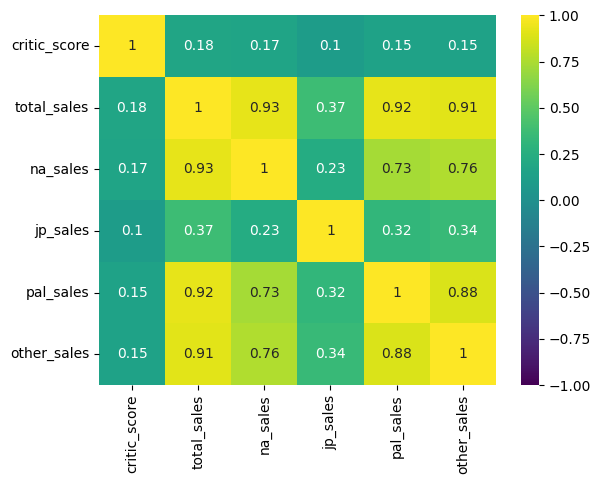

In [27]:
temp = df_vg2[df_vg2['critic_score'].notna()]

# Se hace un mapa de calor (heatmap) para determinar la relacion de critic_score con las columnas de ventas
sns.heatmap(temp[['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']].corr(), 
            vmin = -1, vmax =1, cmap = 'viridis', annot = True);

# En general el critic_score, tiene baja relación con las ventas, por lo que, para el análisis de mercado no me es util (posiblemente debido al alto porcentaje de nulos que tiene)

In [28]:
df_vg2['critic_score'].notna().sum()


np.int64(6648)

In [29]:
df_vg2.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
count,6648.000000,6.023000e+04,6.023000e+04,6.023000e+04,6.023000e+04,6.023000e+04,60230,60230
mean,7.221194,1.077734e+05,5.424572e+04,1.096879e+04,3.169998e+04,1.078715e+04,2008-11-15 23:32:20.282251264,2009-08-16 05:38:49.749294336
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1990-01-01 00:00:00,1990-01-01 00:00:00
25%,6.400000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2002-12-19 00:00:00,2003-05-28 00:00:00
50%,7.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2009-08-27 00:00:00,2009-11-04 00:00:00
75%,8.300000,2.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2014-11-18 00:00:00,2018-04-20 00:00:00
max,10.000000,2.032000e+07,9.760000e+06,2.130000e+06,9.850000e+06,3.120000e+06,2024-12-31 00:00:00,2024-01-28 00:00:00
std,1.456204,4.787846e+05,2.484986e+05,6.130193e+04,1.911710e+05,6.614357e+04,NaN,NaN


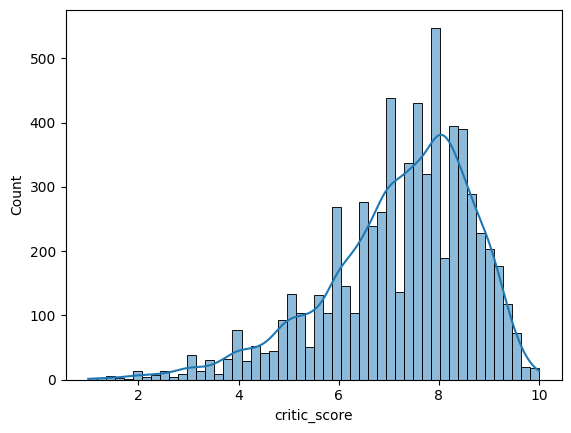

In [30]:
sns.histplot(data=df_vg2['critic_score'],
             bins=50,
             kde=True);

In [31]:
# Crear una columna que clasifique las calificaciones en rangos (bajas, medias, altas)
bins = [0, 5, 7, 10]
labels = ['Bajas', 'Medias', 'Altas']
df_vg2['calificacion_critica'] = pd.cut(df_vg2['critic_score'], bins=bins, labels=labels, right=False)

In [32]:
# df_vg2[['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']] = np.log1p(df_vg[['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']])

# sns.histplot(data = df_vg2["total_sales"],
#              bins=80,
#              kde=True);

## Para mejorar la legibilidad del grafico, se usa el log1p (Se utiliza cuando hay valores como 0 o cercanos a este, ln (0+1))
# y no el log10 porque cuando son 0, no se le puede aplicar este ultimo.

In [33]:
df_vg2.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
count,6648.000000,6.023000e+04,6.023000e+04,6.023000e+04,6.023000e+04,6.023000e+04,60230,60230
mean,7.221194,1.077734e+05,5.424572e+04,1.096879e+04,3.169998e+04,1.078715e+04,2008-11-15 23:32:20.282251264,2009-08-16 05:38:49.749294336
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1990-01-01 00:00:00,1990-01-01 00:00:00
25%,6.400000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2002-12-19 00:00:00,2003-05-28 00:00:00
50%,7.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2009-08-27 00:00:00,2009-11-04 00:00:00
75%,8.300000,2.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2014-11-18 00:00:00,2018-04-20 00:00:00
max,10.000000,2.032000e+07,9.760000e+06,2.130000e+06,9.850000e+06,3.120000e+06,2024-12-31 00:00:00,2024-01-28 00:00:00
std,1.456204,4.787846e+05,2.484986e+05,6.130193e+04,1.911710e+05,6.614357e+04,NaN,NaN


In [34]:
df_vg2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60230 entries, 0 to 64015
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   title                 60230 non-null  object        
 1   console               60230 non-null  object        
 2   genre                 60230 non-null  object        
 3   publisher             60230 non-null  object        
 4   developer             60230 non-null  object        
 5   critic_score          6648 non-null   float64       
 6   total_sales           60230 non-null  float64       
 7   na_sales              60230 non-null  float64       
 8   jp_sales              60230 non-null  float64       
 9   pal_sales             60230 non-null  float64       
 10  other_sales           60230 non-null  float64       
 11  release_date          60230 non-null  datetime64[ns]
 12  last_update           60230 non-null  datetime64[ns]
 13  console_company      

In [35]:
# Renombrar las columnas con nombres más entendibles en español
df_vg2 = df_vg2.rename(columns={
    'title': 'titulo',
    'console': 'consola',
    'genre': 'genero',
    'publisher': 'editor',
    'developer': 'desarrollador',
    'critic_score': 'puntuacion_critica',
    'total_sales': 'ventas_totales',
    'na_sales': 'ventas_na',
    'jp_sales': 'ventas_japon',
    'pal_sales': 'ventas_europa',
    'other_sales': 'ventas_otros',
    'release_date': 'fecha_lanzamiento',
    'last_update': 'ultima_actualizacion',
    'console_company': 'empresa_consola',
    'calificacion_critica': 'categoria_calificacion'
})

# Mostrar las primeras filas para verificar los cambios
df_vg2.head()


,titulo,consola,genero,editor,desarrollador,puntuacion_critica,ventas_totales,ventas_na,ventas_japon,ventas_europa,ventas_otros,fecha_lanzamiento,ultima_actualizacion,empresa_consola,categoria_calificacion
0,Grand Theft Auto V,PS3,Acción,Rockstar Games,Rockstar North,9.4,20320000.0,6370000.0,990000.0,9850000.0,3120000.0,2013-09-17,2013-09-17,Sony,Altas
1,Grand Theft Auto V,PS4,Acción,Rockstar Games,Rockstar North,9.7,19390000.0,6060000.0,600000.0,9710000.0,3020000.0,2014-11-18,2018-01-03,Sony,Altas
2,Grand Theft Auto: Vice City,PS2,Acción,Rockstar Games,Rockstar North,9.6,16150000.0,8410000.0,470000.0,5490000.0,1780000.0,2002-10-28,2002-10-28,Sony,Altas
3,Grand Theft Auto V,X360,Acción,Rockstar Games,Rockstar North,NaN,15860000.0,9060000.0,60000.0,5330000.0,1420000.0,2013-09-17,2013-09-17,Microsoft,NaN
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15090000.0,6180000.0,410000.0,6050000.0,2440000.0,2015-11-06,2018-01-14,Sony,Altas


In [36]:
# Convertir las columnas de ventas a enteros sin decimales para evitar posibles errores
ventas_columnas = ['ventas_totales', 'ventas_na', 'ventas_japon', 'ventas_europa', 'ventas_otros']
df_vg2[ventas_columnas] = df_vg2[ventas_columnas].fillna(0).astype(int)

# Mostrar las primeras filas para verificar el cambio
df_vg2.head()

,titulo,consola,genero,editor,desarrollador,puntuacion_critica,ventas_totales,ventas_na,ventas_japon,ventas_europa,ventas_otros,fecha_lanzamiento,ultima_actualizacion,empresa_consola,categoria_calificacion
0,Grand Theft Auto V,PS3,Acción,Rockstar Games,Rockstar North,9.4,20320000,6370000,990000,9850000,3120000,2013-09-17,2013-09-17,Sony,Altas
1,Grand Theft Auto V,PS4,Acción,Rockstar Games,Rockstar North,9.7,19390000,6060000,600000,9710000,3020000,2014-11-18,2018-01-03,Sony,Altas
2,Grand Theft Auto: Vice City,PS2,Acción,Rockstar Games,Rockstar North,9.6,16149999,8410000,470000,5490000,1780000,2002-10-28,2002-10-28,Sony,Altas
3,Grand Theft Auto V,X360,Acción,Rockstar Games,Rockstar North,NaN,15860000,9060000,60000,5330000,1420000,2013-09-17,2013-09-17,Microsoft,NaN
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15090000,6180000,410000,6050000,2440000,2015-11-06,2018-01-14,Sony,Altas


In [37]:
# # Guardar el dataset limpio en caso de que queramos hacer un dashboard
# df_vg2.to_csv(r"C:\Users\rafae\Documents\GitHub\EDA\src\data\Sales_Videogames_90-24_(Clean).csv", index=False)